In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error

# Indian Housing Prices with Linear Regression
In this notebook we work with the Indian House Prices Dataset (https://www.kaggle.com/datasets/sonukiller99/indian-house-price-combined)

In [2]:
data = pd.read_csv('Indian House Prices.csv')

In [3]:
data.info() #Looing at the data types and null counts.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9390 entries, 0 to 9389
Data columns (total 44 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           9390 non-null   int64  
 1   Price                9390 non-null   float64
 2   Area                 9390 non-null   int64  
 3   Location             9390 non-null   object 
 4   No. of Bedrooms      9390 non-null   float64
 5   Resale               9390 non-null   int64  
 6   MaintenanceStaff     9390 non-null   float64
 7   Gymnasium            9390 non-null   float64
 8   SwimmingPool         9390 non-null   float64
 9   LandscapedGardens    9390 non-null   float64
 10  JoggingTrack         9390 non-null   float64
 11  RainWaterHarvesting  9390 non-null   float64
 12  IndoorGames          9390 non-null   float64
 13  ShoppingMall         9390 non-null   float64
 14  Intercom             9390 non-null   float64
 15  SportsFacility       9390 non-null   f

In [4]:
data.head()

,Unnamed: 0,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,...,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,City,Latitude,Longitude
0,0,300.00,3340,JP Nagar Phase 1,4.0,0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Banglore,12.265594,76.646540
1,1,83.58,1675,Doddanekundi,3.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Banglore,12.971319,77.696477
2,2,68.45,1670,Kengeri,3.0,0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Banglore,12.917657,77.483757
3,3,67.97,1220,Horamavu,2.0,0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Banglore,13.027331,77.660151
4,4,200.00,2502,Thanisandra,4.0,0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Banglore,13.054713,77.633926


# We need to transform the data so it is machine readable.

In [5]:
final_data = data.drop(['Unnamed: 0','Location','City'], axis=1) #Dropping the location columns since they cannot directly be used. If we decide to cluster the data based on locations, then they might be useful. We do have Latitude and Longitude though.

In [6]:
final_data.head()

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,Latitude,Longitude
0,300.00,3340,4.0,0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.265594,76.646540
1,83.58,1675,3.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.971319,77.696477
2,68.45,1670,3.0,0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.917657,77.483757
3,67.97,1220,2.0,0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.027331,77.660151
4,200.00,2502,4.0,0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.054713,77.633926


In [7]:
X = final_data.values
y = final_data.Price
#Extracting data into X and y for fitting in the regression model.

In [8]:
X = pd.DataFrame(X, columns=final_data.columns) # little trick to get the column names in correctly
X = X.drop(['Price'],axis=1)
y = pd.Series(y)

In [9]:
X.head()

,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,...,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,Latitude,Longitude
0,3340.0,4.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.265594,76.646540
1,1675.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.971319,77.696477
2,1670.0,3.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.917657,77.483757
3,1220.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.027331,77.660151
4,2502.0,4.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.054713,77.633926


In [10]:
X.describe()

,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,...,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,Latitude,Longitude
count,9390.000000,9390.000000,9390.000000,9390.000000,9390.000000,9390.000000,9390.000000,9390.000000,9390.000000,9390.000000,...,9390.000000,9390.000000,9390.000000,9390.000000,9390.000000,9390.000000,9390.000000,9390.000000,9390.000000,9390.000000
mean,1354.274973,2.472311,0.352183,0.171778,0.509904,0.405644,0.342279,0.320554,0.365282,0.278594,...,0.296166,0.049414,0.022258,0.056550,0.053248,0.051544,0.021832,0.051864,18.778749,74.315855
std,719.154146,0.762603,0.477676,0.377208,0.499929,0.491042,0.474498,0.466714,0.481535,0.448331,...,0.456589,0.216743,0.147528,0.230992,0.224540,0.221117,0.146142,0.221764,7.554944,18.613870
min,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-28.816624,-117.147666
25%,924.250000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.980165,77.036315
50%,1200.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.451210,77.746994
75%,1610.000000,3.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.227342,79.922469
max,9900.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,65.447377,127.655678


In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9390 entries, 0 to 9389
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Area                 9390 non-null   float64
 1   No. of Bedrooms      9390 non-null   float64
 2   Resale               9390 non-null   float64
 3   MaintenanceStaff     9390 non-null   float64
 4   Gymnasium            9390 non-null   float64
 5   SwimmingPool         9390 non-null   float64
 6   LandscapedGardens    9390 non-null   float64
 7   JoggingTrack         9390 non-null   float64
 8   RainWaterHarvesting  9390 non-null   float64
 9   IndoorGames          9390 non-null   float64
 10  ShoppingMall         9390 non-null   float64
 11  Intercom             9390 non-null   float64
 12  SportsFacility       9390 non-null   float64
 13  ATM                  9390 non-null   float64
 14  ClubHouse            9390 non-null   float64
 15  School               9390 non-null   f

# Now lets fit our data into the model.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.10, random_state=108) 

In [34]:
reg = LinearRegression() #Our regressor for predictions
reg_dummy = DummyRegressor(strategy='mean') #A dummy regressor for comparison

In [35]:
reg.fit(X_train,y_train)

LinearRegression()

In [36]:
reg_dummy.fit(X_train,y_train)

DummyRegressor()

# Evaluation

In [37]:
y_pred = reg.predict(X_test)

In [38]:
dumb_y_pred = reg_dummy.predict(X_test)

In [39]:
reg_score = np.sqrt(mean_squared_error(y_test, y_pred))
dummy_score = np.sqrt(mean_squared_error(y_test, dumb_y_pred))
print (f"the RMSE for our regressor is:{reg_score}")
print (f"the RMSE for our dummy is:{dummy_score}")

the RMSE for our regressor is:56.14221204726255
the RMSE for our dummy is:90.99716133366465


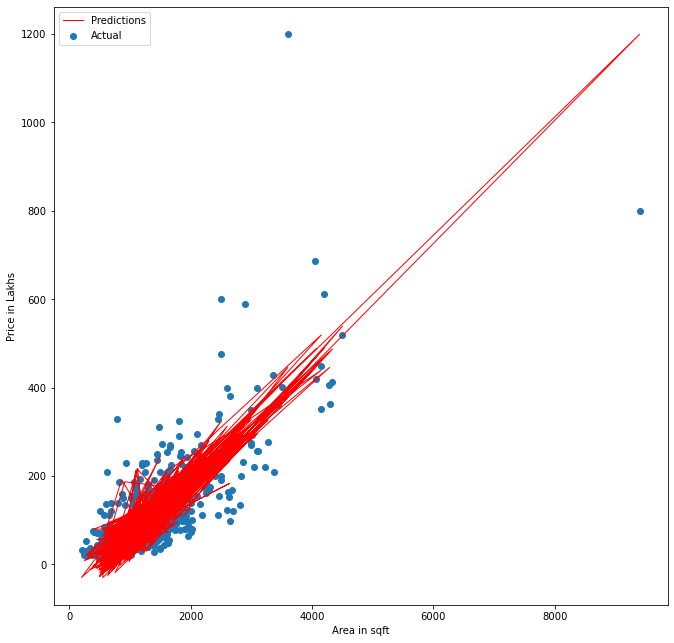

In [43]:
plt.figure(figsize=(11,11))
plt.plot(X_test.Area, reg.predict(X_test), color="r", linewidth=1, label='Predictions')
plt.scatter(X_test.Area, y_test, label='Actual')
plt.xlabel("Area in sqft")
plt.ylabel("Price in Lakhs")
plt.legend();

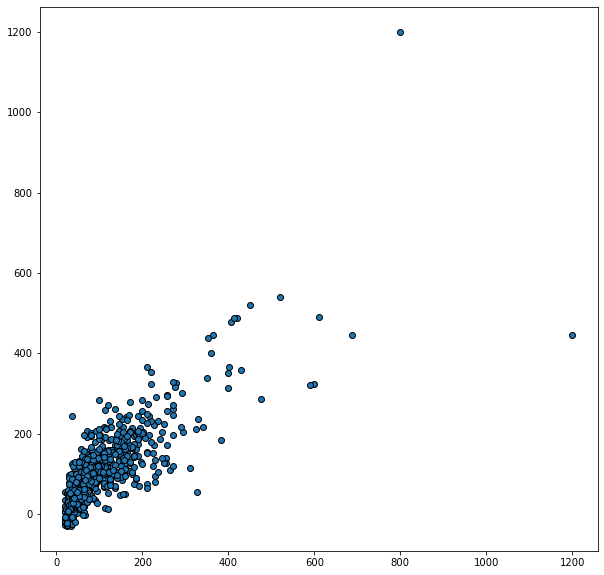

In [42]:
plt.figure(figsize=(10,10))

plt.scatter(y_test, y_pred, edgecolors='black')